In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1.1 – Net Force with Quadratic Drag

The drag force is given by:

$$F_d = - k_2 v |v|$$

At **terminal velocity** $v_t$, the drag balances the gravitational force:

$$|F_g| = mg = |F_d| = k_2 v_t^2$$

Solving for $v_t$:

$$v_t = \sqrt{\frac{mg}{k_2}}$$


We can now express the drag force in terms of $v_t$:


$$F_d = - \left(\frac{mg}{v_t^2}\right)v|v|$$


Thus, the **net force** on the object is:

$$F = F_g + F_d = - mg \left[ 1 + \left(\frac{v|v|}{v_t^2}\right) \right]$$



In [2]:
# 1.2 (solve 1D Newtonian EOM for (constant) free fall and quadratic drag numerically)
class particle:

    def __init__(self, t=0.0, m=1.0, y=0.0, v=0.0): # particle with attributes time, mass, position, and velocity (SI units)
        self.t = t
        self.m = m
        self.y = y
        self.v = v
        
    def forward_euler(self, F, dt): # forward Euler step to update particle attributes given general force function F(t,m,y,v) and timestep dt
        self.v = self.v + (F(self.t, self.m, self.y, self.v)/self.m)*dt # v_(i+1) = v_i + a_i*dt
        self.y = self.y + self.v*dt # y_(i+1) = y_i + v_i*dt
        self.t = self.t + dt   # t_(i+1) = t_i + dt


def forward_euler_solver(F, t_0, m_0, y_0, v_0, dt): # executes forward Euler method given force, initial conditions, and timestep
    p = particle(t_0, m_0, y_0, v_0) # create particle instance with initial conditions
    ts, ys, vs = [p.t], [p.y], [p.v] # lists to store time, position, velocity values at each timestep
    while p.y > 0: # while loop terminates when pebble hits the ground (y=<0)
        p.forward_euler(F, dt)
        ts.append(p.t)
        ys.append(p.y)
        vs.append(p.v)
    return np.array(ts), np.array(ys), np.array(vs)

# constants, initial conditions and timestep
g = 9.8
v_t = 30
t_0 = 0
m_0 = 0.01 
y_0 = 50
v_0 = 0
dt = 0.00001

F_gc = lambda t, m, y, v: - m*g # (constant) free fall force (lambda function of t, m, y, v)
F_quad = lambda t, m, y, v: - m*g*(1+(v*abs(v) /v_t**2)) # quadratic drag force

vf_gc = abs(forward_euler_solver(F_gc, t_0, m_0, y_0, v_0, dt)[2][-1]) 
vf_quad = abs(forward_euler_solver(F_quad, t_0, m_0, y_0, v_0, dt)[2][-1])

print(f'The impact speed of the pebble released from height {y_0} m (free fall) is ~ {vf_gc} m/s')
print(f'The impact speed of the pebble released from height {y_0} m (quadratic drag) is ~ {vf_quad} m/s')

'''vf_quad < vf_gc, as expected'''


The impact speed of the pebble released from height 50 m (free fall) is ~ 31.304924000168914 m/s
The impact speed of the pebble released from height 50 m (quadratic drag) is ~ 24.434994677335023 m/s


'vf_quad < vf_gc, as expected'

### 1.3 - Analytic Result
The EOM can be solved analytically:

$$ v = - v_t \tanh \left(\frac{gt}{v_t}+v_0 \right) = - v_t \tanh \left(\frac{gt}{v_t}\right) $$
$$ y = y_0 - \frac{v_t^2}{g} \ln \left[\cosh \left(\frac{gt}{v_t} \right) \right]

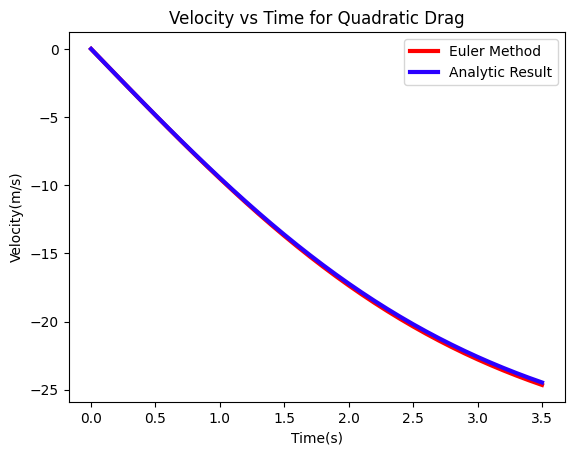

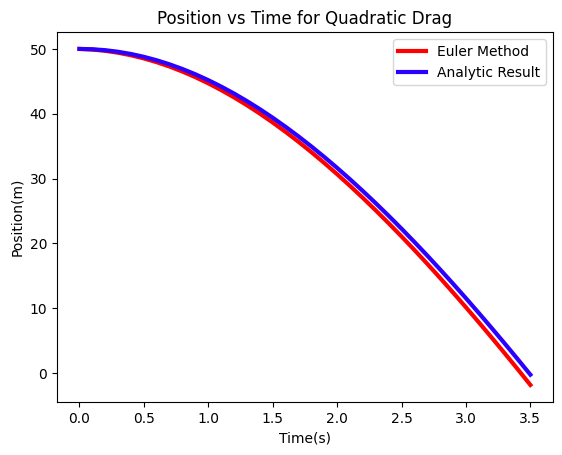

In [3]:
# 1.3 (numeric vs analytic result)
ts, ys_euler, vs_euler = forward_euler_solver(F_quad, t_0, m_0, y_0, v_0, dt=0.1) #  set larger time step dt = 0.1 s (to see deviations)
# analytic results for velocity and position (at same time steps as forward Euler method)
vs = - v_t * np.tanh(g*ts/v_t) 
ys = y_0 - (v_t**2/g)*np.log(np.cosh(g*ts/v_t)) 

plt.plot(ts, vs_euler, color="#FF0000", ls='-', lw=3)
plt.plot(ts, vs, color="#2B00FF", ls='-', lw=3)
plt.xlabel('Time(s)')
plt.ylabel('Velocity(m/s)')
plt.title('Velocity vs Time for Quadratic Drag')
plt.legend(['Euler Method', 'Analytic Result'])
plt.show() # separate plot for velocity

plt.plot(ts, ys_euler, color="#FF0000", ls='-', lw=3)
plt.plot(ts, ys, color="#2B00FF", ls='-', lw=3)
plt.ylabel('Position(m)')
plt.xlabel('Time(s)')
plt.title('Position vs Time for Quadratic Drag')
plt.legend(['Euler Method', 'Analytic Result'])
plt.show() # separate plot for position


In [4]:
# 2.1 (solve 1D Newtonian EOM for non-constant free fall numerically)
# constants, initial conditions, and timestep
M = 5.97e24 
G = 6.67e-11
R = 6.37e6
t_0 = 0
m_0 = 0.01 
v_0 = 0
dt = 0.01

F_gv = lambda t, m, y, v: - G*M*m/(R+y)**2 # non-constant free fall force function

for y_0 in [50,2*R]:
    v_f =  abs(forward_euler_solver(F_gv, t_0, m_0, y_0, v_0, dt)[2][-1])
    print(f'The impact speed of the pebble released from height {y_0} m (non-constant free fall) is ~ {abs(v_f)} m/s')


The impact speed of the pebble released from height 50 m (non-constant free fall) is ~ 31.3045478262978 m/s
The impact speed of the pebble released from height 12740000.0 m (non-constant free fall) is ~ 9129.581901526084 m/s


In [5]:
#2.2 (comparing with constant gravity)
def compare(t_0, m_0, y_0, v_0, dt):
    vs_v = forward_euler_solver(F_gv, t_0, m_0, y_0, v_0, dt)[2]
    v_f = vs_v[-1]

    for y in np.linspace(0, 2*y_0, 1000):        
        vs_c = forward_euler_solver(F_gc, t_0, m_0, y, v_0, dt)[2]
        v_f_c = vs_c[-1]
        if abs((v_f - v_f_c)/v_f) < .01:
            return y

y_0 = 50
print(compare(t_0, m_0, y_0, v_0, dt = 0.01))

y_0 = 2 * R
print(compare(t_0, m_0, y_0, v_0, dt = 0.01))



49.14914914914915
4182902.902902903


In [46]:
#3,1

Text(0.5, 1.0, 'Position vs Time for Damped Harmonic Oscillator (dc = 0.5)')

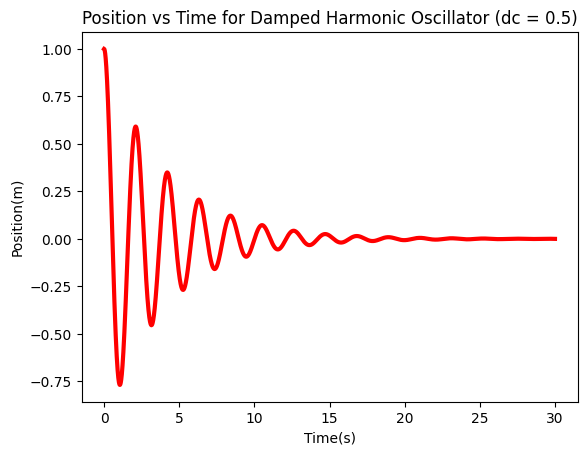

In [6]:
#4.1 (solve 1D damped harmonic oscillator EOM numerically)
class damped_harmonic_oscillator:

    def __init__(self, nf, dc, t, x, v): # DHO with attributes time, position, velocity, damping coefficient, and natural frequency (SI units)
        self.nf = nf
        self.dc = dc
        self.t = t
        self.x = x
        self.v = v
        
    def symplectic_euler(self, dt): # symplectic Euler step to update DHO attributes given timestep dt (forward Euler is unstable)
        self.v = self.v - ((self.nf**2)*self.x + self.dc*self.v)*dt # v_(i+1) = v_i + a_i*dt
        self.x = self.x + self.v*dt # x_(i+1) = x_i + v_(i+1)*dt
        self.t = self.t + dt # t_(i+1) = t_i + dt

def symplectic_euler_solver(nf, dc, t_0, x_0, v_0, dt, T): # executes symplectic Euler method given initial conditions, timestep, and runtime
    dho = damped_harmonic_oscillator(nf, dc, t_0, x_0, v_0) # create DHO instance with initial conditions
    ts, xs = [dho.t], [dho.x] # lists to store time, position values at each timestep
    while dho.t < T: # while loop terminates when time reaches T s
        dho.symplectic_euler(dt)
        ts.append(dho.t)
        xs.append(dho.x)
    return np.array(ts), np.array(xs)

# constants, initial conditions, timestep, and run time  
nf = 3 
dc = 0.5  
t_0 = 0
x_0 = 1
v_0 = 0
dt = 0.00001
T = 30

ts, xs_euler = symplectic_euler_solver(nf, dc, t_0, x_0, v_0, dt, T) 
plt.plot(ts, xs_euler, color="#FF0000", ls='-', lw=3)
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.title('Position vs Time for Damped Harmonic Oscillator (dc = 0.5)')

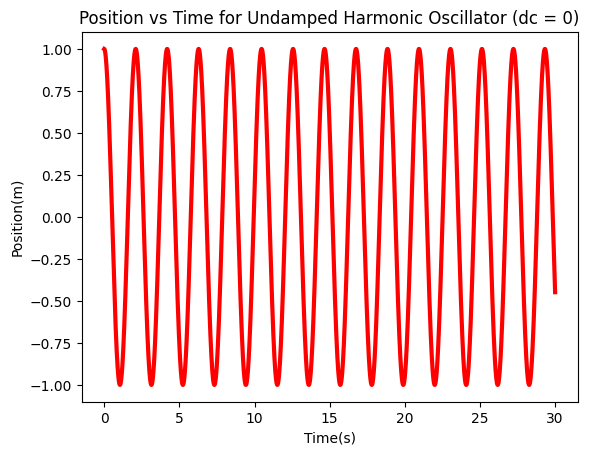

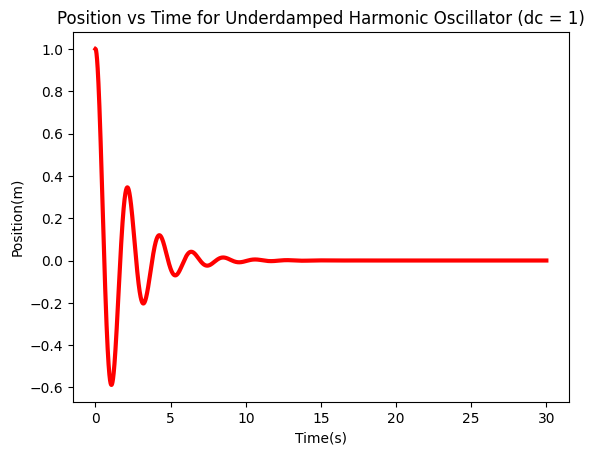

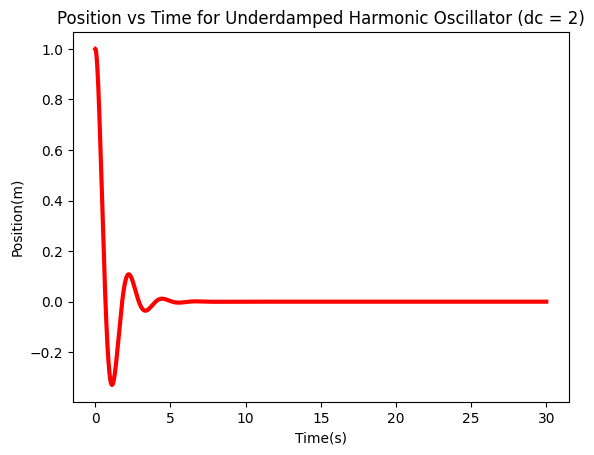

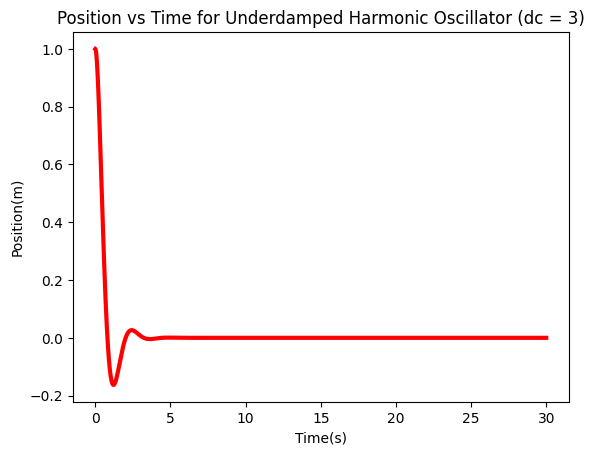

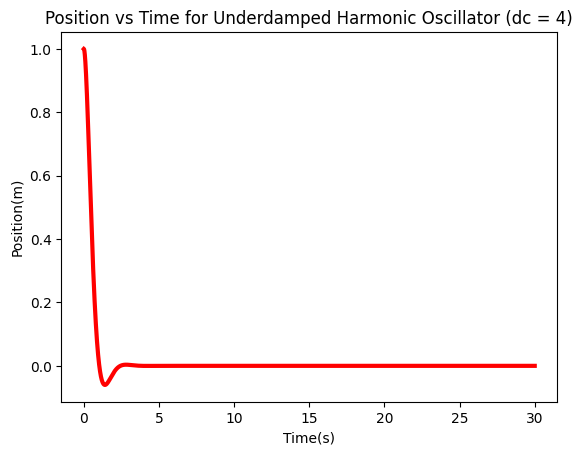

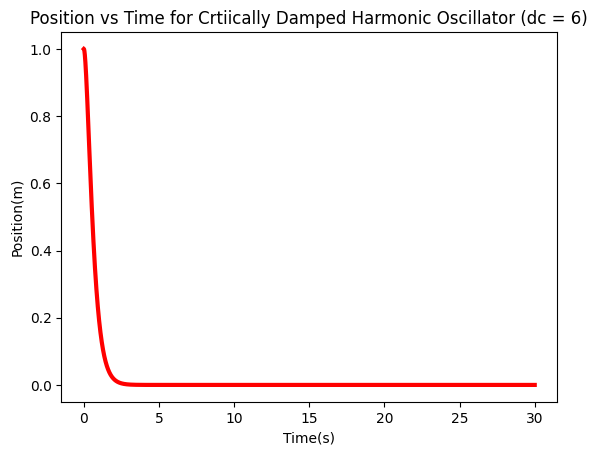

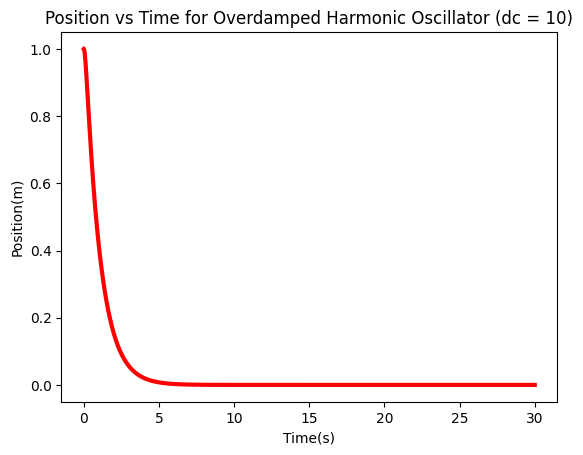

In [7]:
#4.2 (damped frequency vs natural frequency)

''' From the exact solution, the damped frequency is given by df = sqrt(nf^2 - (dc^2)/4), so the larger the damping coefficient, the smaller the damped frequency and the longer the period of oscillation. This is consistent with the numerical plots below. '''

dc = 0 
ts, xs_euler = symplectic_euler_solver(nf, dc, t_0, x_0, v_0, dt, T)
plt.plot(ts, xs_euler, color="#FF0000", ls='-', lw=3)
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.title('Position vs Time for Undamped Harmonic Oscillator (dc = 0)')
plt.show()

for dc in [1, 2, 3, 4]: # underdamped cases (dc < 2*nf = 6), system oscillates with decreasing amplitude
    ts, xs_euler = symplectic_euler_solver(nf, dc, t_0, x_0, v_0, dt, T)
    plt.plot(ts, xs_euler, color="#FF0000", ls='-', lw=3)
    plt.xlabel('Time(s)')
    plt.ylabel('Position(m)')
    plt.title(f'Position vs Time for Underdamped Harmonic Oscillator (dc = {dc})')
    plt.show()

dc = 6 # critically damped case (dc = 2*nf), system returns to equilibrium as quickly as possible without oscillating
ts, xs_euler = symplectic_euler_solver(nf, dc, t_0, x_0, v_0, dt, T)
plt.plot(ts, xs_euler, color="#FF0000", ls='-', lw=3)
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.title('Position vs Time for Crtiically Damped Harmonic Oscillator (dc = 6)')
plt.show()


dc = 10 # overdamped case (dc > 2*(nf)), system returns to equilibrium without oscillating, but slower than in critically damped case
ts, xs_euler = symplectic_euler_solver(nf, dc, t_0, x_0, v_0, dt, T)
plt.plot(ts, xs_euler, color="#FF0000", ls='-', lw=3)
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.title('Position vs Time for Overdamped Harmonic Oscillator (dc = 10)')
plt.show()

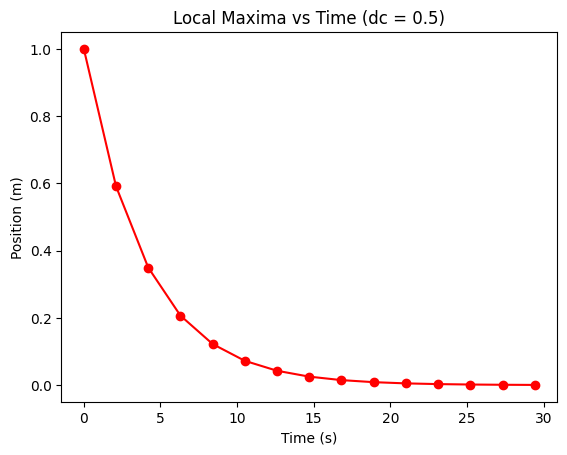

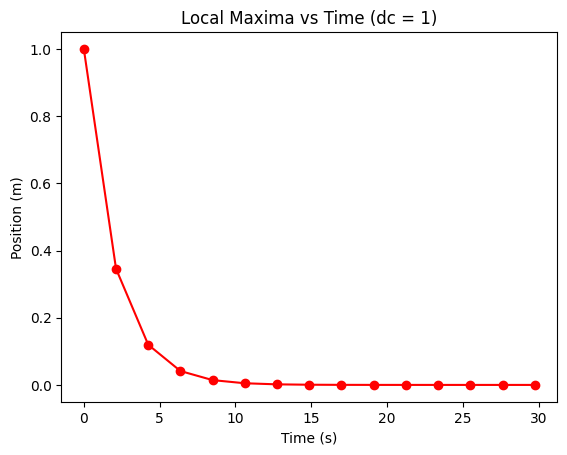

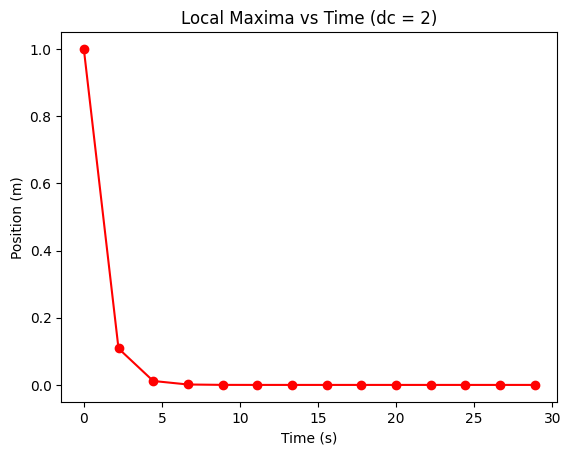

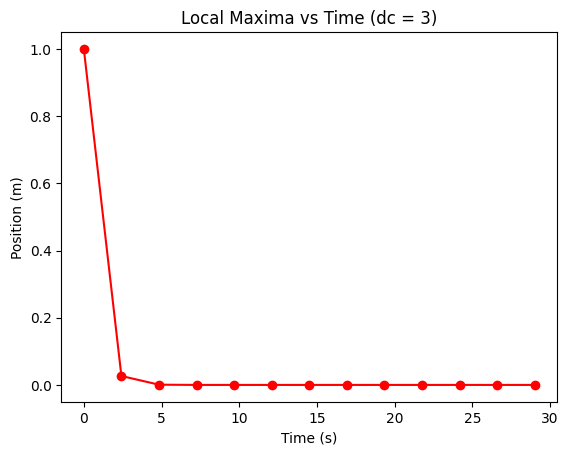

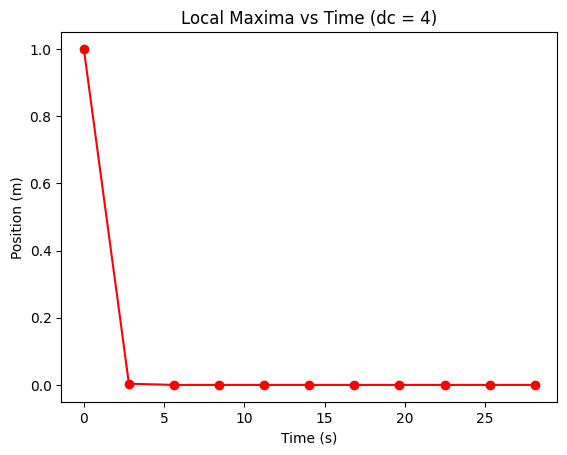

The pairs of damping coefficients and relaxation times are: [(0.5, 3.9999895736583673), (1, 1.9999899505120442), (2, 0.9999899244369258), (3, 0.6666566288122988), (4, 0.49998995139489455)]


'From the data, rel_time~ 2/dc which is consistent with the exact solution, since rel_time = 2/dc.'

In [59]:
#4.3 (compute relaxtion time)

def find_maxima(nf, dc, t_0, x_0, v_0, dt, T):
    ts, xs = symplectic_euler_solver(nf, dc, t_0, x_0, v_0, dt, T) 
    xs_diff = np.diff(xs) # xs_diff[i] = xs[i+1] - xs[i] (length len(xs)-1)

    # check for sign changes in the difference of adjacent x values, append i+1 (index of approx. local maxima)
    i_max = [i+1 for i in range(len(xs_diff)-1) if xs_diff[i] > 0 and xs_diff[i+1] < 0]
    # assume (t_0, x_0) is the first local maximum
    t_list = [t_0]+ [float(ts[i]) for i in i_max] 
    x_max = [x_0] + [float(xs[i]) for i in i_max] 
    return np.array(t_list), np.array(x_max)
   
def find_relaxation_times(tms,xms):
    xms = np.abs(xms) # take absolute value of maxima to avoid issues with log of negative numbers
    if len(tms) < 2: # need at least 2 maxima to fit line
        print('Not enough maxima found. Increase T or decrease dt.')
        return None
    log_xms = np.log(xms)
    c_1 = np.polyfit(tms, log_xms, 1) # fit polynomial of degree 1 (line) to ln(xms) = c_1[0]*tms + x_0
    return float(-1/c_1[0]) # relaxation time is -1/slope of line fit to ln(xms) vs tms

# constants, initial conditions, timestep, and run time
nf = 3
t_0 = 0
x_0 = 1
v_0 = 0
dt = 0.00001
T = 30

dcs_rel_times = [] # list to store (damping coefficient, relaxation time) tuples
for dc in [0.5, 1, 2, 3, 4]: # underdamped cases (dc < 2*nf = 6)
    tms, xms = find_maxima(nf, dc, t_0, x_0, v_0, dt, T)
    plt.plot(tms,xms, '-o', color="#FF0000")
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
    plt.title(f'Local Maxima vs Time (dc = {dc})')
    plt.show()
    rel_time = find_relaxation_times(tms,xms)
    dcs_rel_times.append((dc, rel_time))  

print(f'The pairs of damping coefficients and relaxation times are: {dcs_rel_times}')

'''From the data, rel_time~ 2/dc which is consistent with the exact solution, since rel_time = 2/dc.'''



In [ ]:
#5 